In [44]:
import glob
from tools.compress import load

data = []

for file in glob.glob("./results-bdi*.json"):
    print(file)
    try:
        d = load(file)
    except Exception:
        continue
    for experiment in d:
        if not len(experiment["probas"]):
            continue
        data.append({
            "perfect": experiment["probas"].count(1.0)/len(experiment["probas"]),
            "mean": sum(experiment["probas"])/len(experiment["probas"]),
            "exp": len(experiment["probas"]),
            "gap": abs(experiment["gap"]) * (-1 if "True" in file else 1),
            "year": experiment["date"],
            "author": experiment["author"],
            "reverse": "False" in file
        })


./results-bdi-1-True.json
./results-bdi-15-False.json
./results-bdi-5-False.json
./results-bdi-15-True.json
./results-bdi-10-True.json
./results-bdi-5-True.json
./results-bdi-1-False.json
./results-bdi-10-False.json


In [45]:
import pandas as pd

df = pd.DataFrame(data)
df = df.sort_values(["gap", "author"])
df

,perfect,mean,exp,gap,year,author,reverse
438,0.00,0.976489,45,-15,1832,balzac,False
439,0.22,0.994400,50,-15,1829,balzac,False
440,0.14,0.983820,50,-15,1830,balzac,False
441,0.02,0.983280,50,-15,1831,balzac,False
442,0.00,0.722200,50,-15,1833,balzac,False
...,...,...,...,...,...,...,...
169,1.00,1.000000,50,15,1882,zola,True
170,1.00,1.000000,50,15,1878,zola,True
171,1.00,1.000000,48,15,1875,zola,True
172,1.00,1.000000,46,15,1873,zola,True


In [46]:
df[df.author=="zola"].pivot(index=['reverse', 'year'], columns='gap', values='mean')

gap                -15       -10       -5        -1         1         5   \
reverse year                                                               
False   1871  0.998878  0.999694  0.999755  0.999918       NaN       NaN   
        1872  0.998432  0.999568  0.999818  0.999955       NaN       NaN   
        1873  0.998870  0.999891  0.999978  0.999957       NaN       NaN   
        1874  0.988812  0.996938  0.996104  0.997063       NaN       NaN   
        1875  0.994896  0.999437  0.999375  0.999854       NaN       NaN   
        1876  0.997500  0.999100  0.999800  0.999760       NaN       NaN   
        1878  0.992840  0.999300  0.999960  0.999980       NaN       NaN   
        1880       NaN  0.999880  1.000000  1.000000       NaN       NaN   
        1882       NaN  0.998960  0.999680  1.000000       NaN       NaN   
        1883       NaN  0.998120  0.999860  1.000000       NaN       NaN   
        1885       NaN       NaN  0.999980  1.000000       NaN       NaN   
        1886       NaN       NaN  0.999860  0.999980       NaN       NaN   
        1887       NaN       NaN  0.999840  0.999960       NaN       NaN   
        1888       NaN       NaN  0.997222  0.999704       NaN       NaN   
        1890       NaN       NaN       NaN  0.999820       NaN       NaN   
        1891       NaN       NaN       NaN  0.999100       NaN       NaN   
        1892       NaN       NaN       NaN  0.993240       NaN       NaN   
True    1871       NaN       NaN       NaN       NaN  1.000000  1.000000   
        1872       NaN       NaN       NaN       NaN  0.981773       NaN   
        1873       NaN       NaN       NaN       NaN  1.000000  1.000000   
        1874       NaN       NaN       NaN       NaN  0.972979       NaN   
        1875       NaN       NaN       NaN       NaN  1.000000  1.000000   
        1876       NaN       NaN       NaN       NaN  0.999880  0.966640   
        1878       NaN       NaN       NaN       NaN  1.000000  1.000000   
        1880       NaN       NaN       NaN       NaN  0.999940  0.999520   
        1882       NaN       NaN       NaN       NaN  1.000000  1.000000   
        1883       NaN       NaN       NaN       NaN  0.999860  0.999880   
        1885       NaN       NaN       NaN       NaN  1.000000  1.000000   
        1886       NaN       NaN       NaN       NaN  0.999980  0.999880   
        1887       NaN       NaN       NaN       NaN  1.000000  1.000000   
        1888       NaN       NaN       NaN       NaN  0.999889  0.999963   
        1890       NaN       NaN       NaN       NaN  1.000000  1.000000   
        1891       NaN       NaN       NaN       NaN  0.999940  0.999860   
        1892       NaN       NaN       NaN       NaN  1.000000  1.000000   
        1893       NaN       NaN       NaN       NaN  1.000000  1.000000   

gap                 10        15  
reverse year                      
False   1871       NaN       NaN  
        1872       NaN       NaN  
        1873       NaN       NaN  
        1874       NaN       NaN  
        1875       NaN       NaN  
        1876       NaN       NaN  
        1878       NaN       NaN  
        1880       NaN       NaN  
        1882       NaN       NaN  
        1883       NaN       NaN  
        1885       NaN       NaN  
        1886       NaN       NaN  
        1887       NaN       NaN  
        1888       NaN       NaN  
        1890       NaN       NaN  
        1891       NaN       NaN  
        1892       NaN       NaN  
True    1871  1.000000  1.000000  
        1872       NaN       NaN  
        1873  1.000000  1.000000  
        1874       NaN       NaN  
        1875  1.000000  1.000000  
        1876       NaN       NaN  
        1878  1.000000  1.000000  
        1880       NaN       NaN  
        1882  1.000000  1.000000  
        1883  0.997180       NaN  
        1885  1.000000  1.000000  
        1886  0.997640  0.892380  
        1887  1.000000  1.000000  
        1888  0.999630  0.988963  
        1890  1.000000  1.000000

In [31]:
df[df.duplicated(["year", "author", "gap", "reverse"], keep=False)].sort_values(["author", "year", "gap"])

df[(df.year == 1832) & (df.author == "balzac")].sort_values(["author", "year", "gap"])
# df[df.gap < 0]
# df[df.gap > 0]
df[df.duplicated(["year", "author", "gap", "reverse"], keep=False)].sort_values(["author", "year", "gap"])

,perfect,mean,exp,gap,year,author,reverse


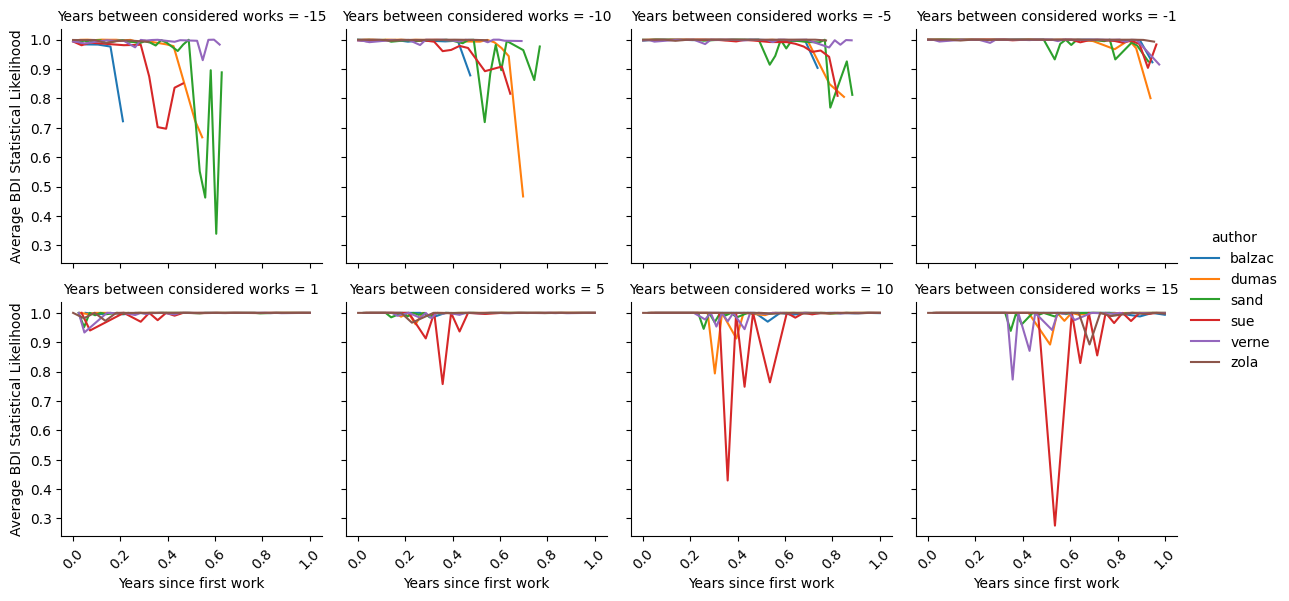

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame
df["relative_year"] = df.groupby("author")["year"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df.sort_values("gap")
# Create a FacetGrid with one facet per 'gap' value
g = sns.FacetGrid(df, col="gap", hue="author", sharey=True, sharex=True, col_wrap=4)

# Map a lineplot to each facet
g.map(sns.lineplot, "relative_year", "mean")

# Add a legend
g.add_legend()

# Rotate x-axis labels for better readability (optional)
for ax in g.axes.flat:
    ax.set_xlabel("Years since first work")
    ax.set_ylabel("Average BDI Statistical Likelihood")
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.set_titles(col_template="Years between considered works = {col_name}")

# Adjust layout
# g.tight_layout()

plt.savefig("normalized_plot_bdi.png", dpi=300, bbox_inches='tight')
plt.show()


,full-100,mean,expes,gap,year,author,reverse
129,0.0,0.824432,44,10,1904,verne,False
131,0.0,0.845160,50,10,1899,verne,False
134,0.0,0.636460,50,10,1897,verne,False
152,0.0,0.906880,50,10,1892,zola,False
155,0.0,0.881720,50,10,1890,zola,False
157,0.0,0.766240,50,10,1887,zola,False
158,0.0,0.811340,50,10,1885,zola,False
169,0.0,0.590971,34,10,1866,sand,False
182,0.0,0.814500,12,10,1857,sue,False
184,0.0,0.684235,17,10,1855,sue,False
